# Analysis of Learning Rate
In this notebook I compare the performance of MLP using different learning rates.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib import *

In [2]:
df = pd.read_csv('../scripts/results_summary.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4536 entries, ce2406bc88ceda4e2fde96bf96fdd2d5 to 9591fefef4086cbf060bc6afdcee4eba
Columns: 170 entries, activation_func to fail_rate
dtypes: bool(1), float64(164), int64(2), object(3)
memory usage: 5.9+ MB


## Effect of Learning Rate in Regression Tasks

The below graphs would suggest that learning rate does indeed have a different effect depending on the activation function. The ReLU activation function tends to blow up at higher learning rates.

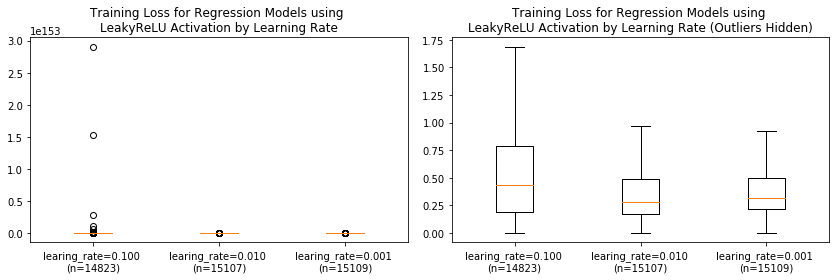

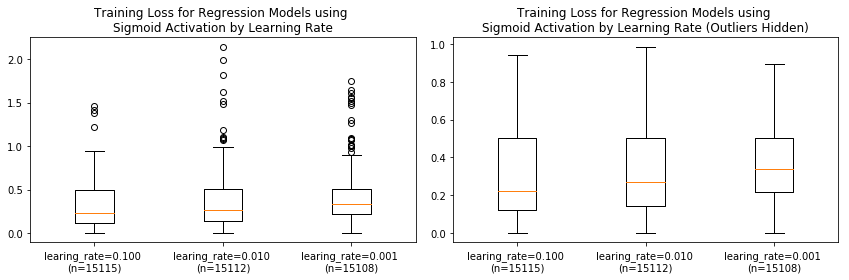

In [3]:
group_masks = [
    df['learning_rate'] == lr for lr in df['learning_rate'].unique()
]
configs = ['learing_rate=%.3f' % lr for lr in df['learning_rate'].unique()]
metric = 'train_loss'

for af_mask, af in zip([using_relu, ~using_relu], ['LeakyReLU', 'Sigmoid']):
    base_mask = using_regression & af_mask
    title = 'Training Loss for Regression Models using \n%s Activation by Learning Rate' % af

    make_n_way_boxplot(df, base_mask, group_masks, configs, metric, title)

Interestingly, the thing that seems to has caused the models trained on the XOR and parity datasets is a low learning rate. This would seem to be the case since the only case were these models converge is with the highest learning rate, 0.1. Perhaps this is because the lower learning rates do not give the models the ability to jump out of local minima.

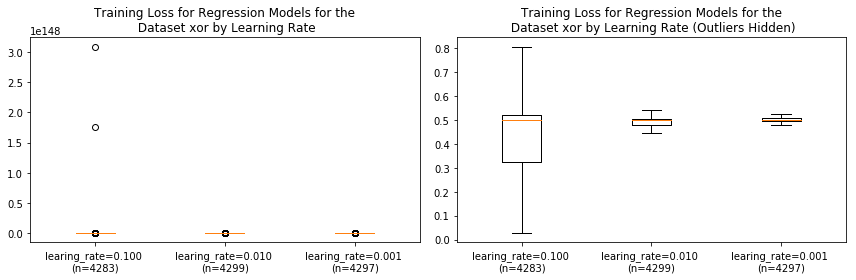

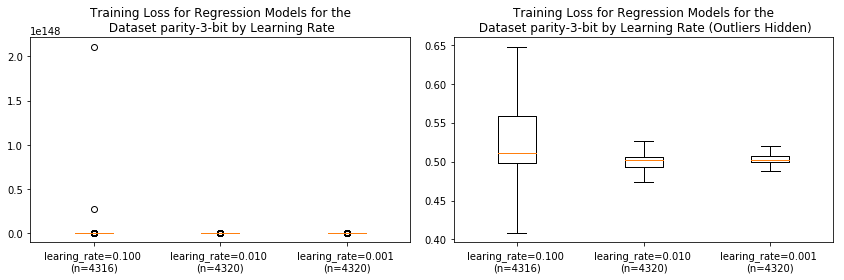

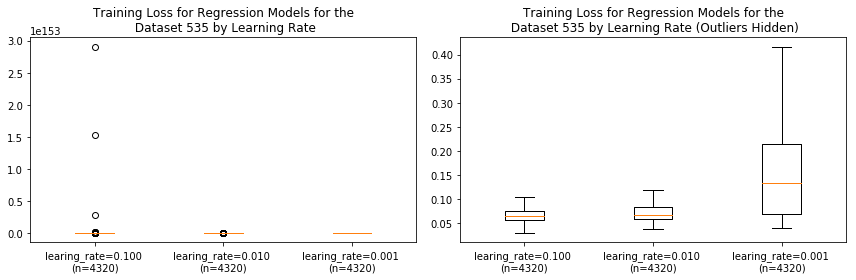

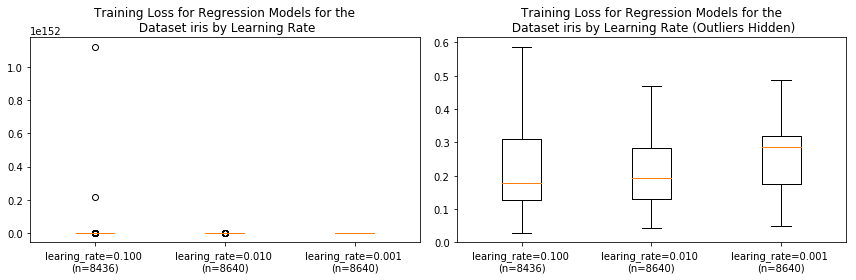

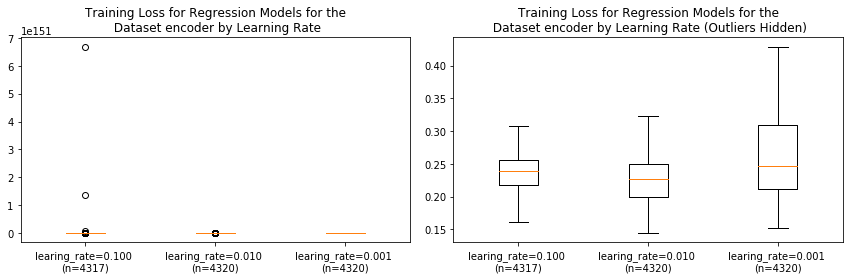

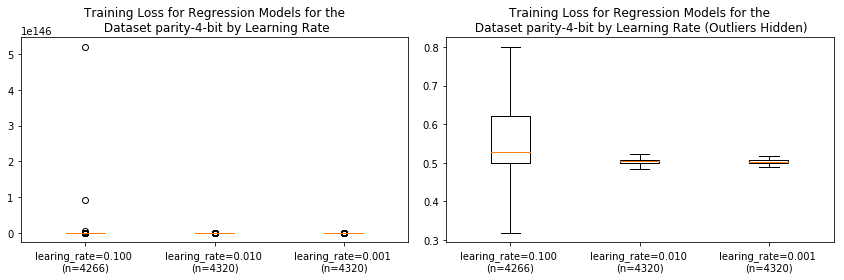

In [4]:
for ds_mask, ds in zip([df['dataset'] == dataset for dataset in datasets], datasets):
    base_mask = using_regression & ds_mask
    title = 'Training Loss for Regression Models for the\n Dataset %s by Learning Rate' % ds

    make_n_way_boxplot(df, base_mask, group_masks, configs, metric, title)

## Does the Same Thing Happen in Classification Tasks?
A similar thing happens with the classification models. I think we can be confident that the learning rate is the main factor towards whether or not the model will fail to converge.

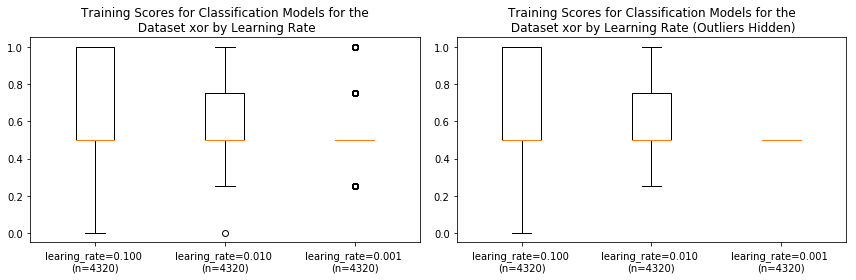

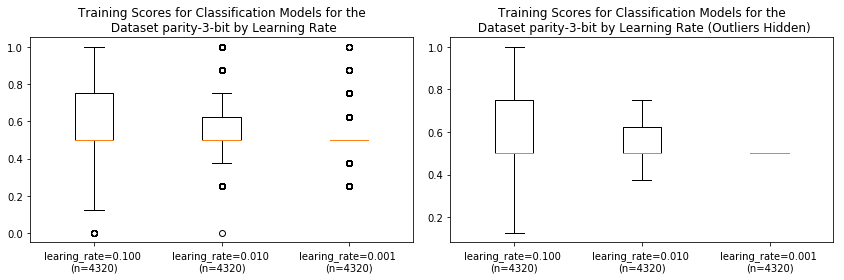

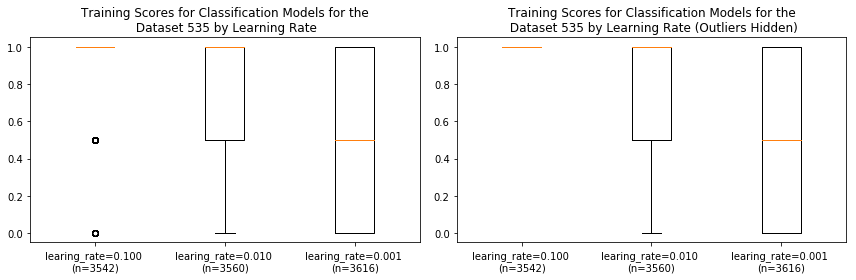

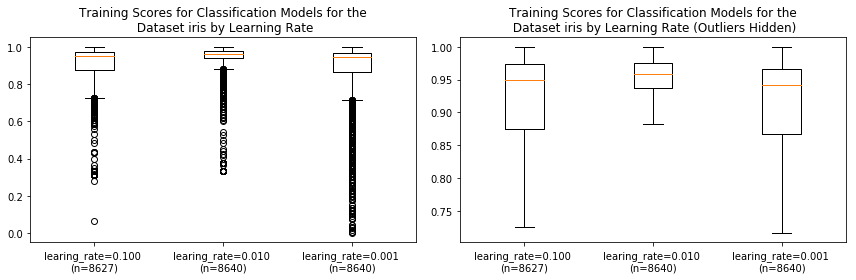

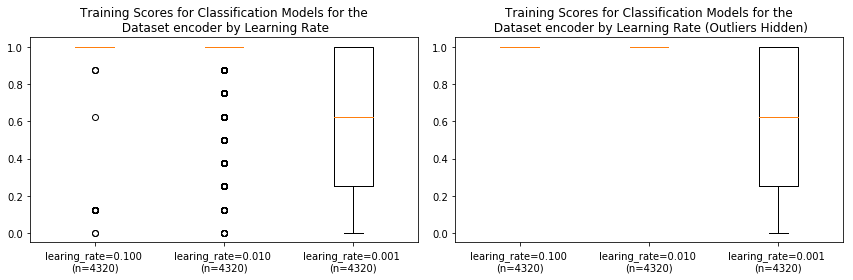

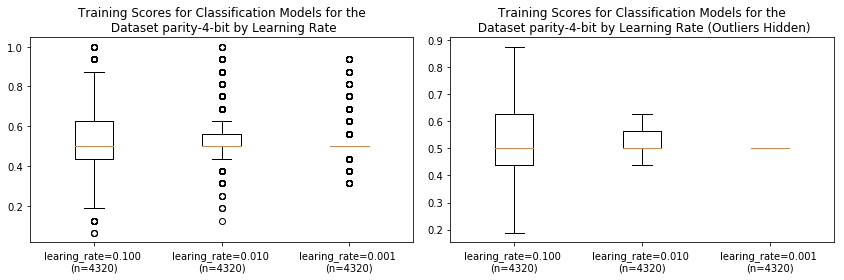

In [5]:
for ds_mask, ds in zip([df['dataset'] == dataset for dataset in datasets], datasets):
    base_mask = using_classification & ds_mask
    title = 'Training Scores for Classification Models for the\n Dataset %s by Learning Rate' % ds

    make_n_way_boxplot(df, base_mask, group_masks, configs, 'train_scores', title)

## Effect of Learning Rate on Failure Rate

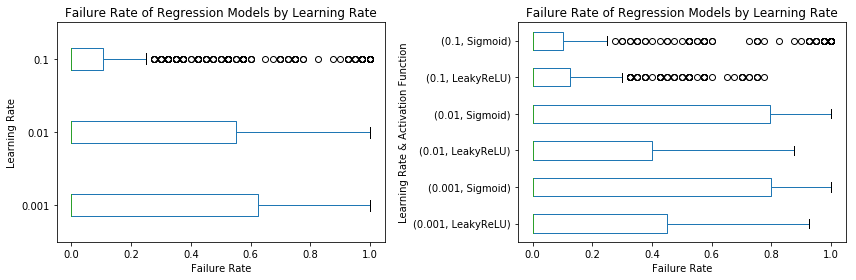

In [7]:
fig, axes = plt.subplots(1, 2, squeeze=True, figsize=(12, 4))

ax = df[using_regression].boxplot(column='fail_rate', by='learning_rate', 
                                  vert=False, grid=False, ax=axes[0])
ax.set_xlabel('Failure Rate')
ax.set_ylabel('Learning Rate')
ax.set_title('Failure Rate of Regression Models by Learning Rate')

ax = df[using_regression].boxplot(column='fail_rate', by=['learning_rate', 'activation_func'], 
                                  vert=False, grid=False, ax=axes[1])
ax.set_xlabel('Failure Rate')
ax.set_ylabel('Learning Rate & Activation Function')
ax.set_title('Failure Rate of Regression Models by Learning Rate')
plt.suptitle('');  # get rid of the generic title pandas gives us.
plt.tight_layout()